In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
reviews_train = load_files("./aclImdb/train")
text_train, y_train = reviews_train.data, reviews_train.target
print("Number of documents in training data: %d" % len(text_train))
print(np.bincount(y_train))

Number of documents in training data: 75000
[12500 12500 50000]


In [3]:
# поменяйте путь к файлу
reviews_test = load_files("./aclImdb/test")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: %d" % len(text_test))
print(np.bincount(y_test))

Number of documents in test data: 25000
[12500 12500]


In [4]:
print(text_train[1], y_train[1])
print('----------------------------')
print(text_train[2], y_train[2])

b"Amount of disappointment I am getting these days seeing movies like Partner, Jhoom Barabar and now, Heyy Babyy is gonna end my habit of seeing first day shows.<br /><br />The movie is an utter disappointment because it had the potential to become a laugh riot only if the d\xc3\xa9butant director, Sajid Khan hadn't tried too many things. Only saving grace in the movie were the last thirty minutes, which were seriously funny elsewhere the movie fails miserably. First half was desperately been tried to look funny but wasn't. Next 45 minutes were emotional and looked totally artificial and illogical.<br /><br />OK, when you are out for a movie like this you don't expect much logic but all the flaws tend to appear when you don't enjoy the movie and thats the case with Heyy Babyy. Acting is good but thats not enough to keep one interested.<br /><br />For the positives, you can take hot actresses, last 30 minutes, some comic scenes, good acting by the lead cast and the baby. Only problem is

In [5]:
cv = CountVectorizer()
cv.fit(text_train)

len(cv.vocabulary_)

124255

In [6]:
print(cv.get_feature_names()[:50])
print(cv.get_feature_names()[50000:50050])

['00', '000', '0000', '0000000000000000000000000000000001', '0000000000001', '000000001', '000000003', '00000001', '000001745', '00001', '0001', '00015', '0002', '0007', '00083', '000ft', '000s', '000th', '001', '002', '003', '003830', '004', '005', '006', '007', '0079', '008', '0080', '0083', '009', '0091042', '0093638', '00am', '00o', '00pm', '00s', '01', '015', '019', '01p', '01pm', '02', '020410', '022', '0267', '029', '03', '0312', '039']
['heathen', 'heathens', 'heather', 'heatherbennett', 'heatherly', 'heathers', 'heatherton', 'heathkit', 'heathrow', 'heating', 'heatman', 'heatmiser', 'heaton', 'heats', 'heatseeker', 'heatwave', 'heave', 'heaved', 'heaven', 'heavenlier', 'heavenliness', 'heavenly', 'heavens', 'heavenward', 'heaves', 'heavier', 'heavies', 'heaviest', 'heavily', 'heaviness', 'heaving', 'heavy', 'heavyarms', 'heavyhanded', 'heavys', 'heavyset', 'heavyweight', 'heavyweights', 'heber', 'hebert', 'hebetude', 'hebner', 'hebraic', 'hebrew', 'hebrews', 'hebrides', 'hebro

In [7]:
X_train = cv.transform(text_train)
X_train

<75000x124255 sparse matrix of type '<class 'numpy.int64'>'
	with 10359806 stored elements in Compressed Sparse Row format>

In [8]:
print(text_train[19726])

b'When celebrating the cycle-of-life "Cabaret" sits on the spice shelf.<br /><br />A town which is occupied by a sausage-factory which comes to life when the meat-plant workers come in for rest and relaxation and perform the lessons and morality-tales which are learned from safe and unsafe handling of food and objects around different life-forms.<br /><br />That sex, love, and family must sometimes be sacrificed to perform and follow the foot-lights of the stage.<br /><br />War is sometimes a bi-product of military-personal racing to their favourite performance venue(s) where "other" children and wives lived and worked in Europe and especially in Germany.<br /><br />The cycle-of-life is the call for many to chase the memory and contact with those people and places which made them excel at something, namely war.<br /><br />That in the end the only way to keep some of the universe\'s life-forms from racing to a celebration of war as depicted in other films such as "Wood Stock" and "Schin

In [9]:
X_train[19726].nonzero()[1]

array([  5618,   7054,   7369,   7611,   8095,  10438,  10846,  12304,
        14846,  16930,  17043,  17335,  19129,  19130,  19874,  20445,
        22862,  22895,  24215,  24427,  26983,  29377,  29850,  30506,
        30509,  35168,  35960,  36083,  37034,  37373,  37740,  38685,
        38949,  39465,  40411,  41637,  41697,  41728,  41777,  42019,
        42941,  44847,  48974,  54396,  56764,  59788,  63251,  63841,
        64209,  64299,  64681,  64804,  65659,  66706,  67864,  69694,
        70191,  71254,  71442,  72560,  73037,  73563,  74308,  74845,
        77646,  77840,  78010,  78458,  78529,  79267,  79272,  82072,
        82219,  82223,  82444,  83765,  83852,  86367,  88401,  90774,
        91678,  94532,  94621,  95632,  96154,  98076,  98732, 100389,
       102253, 102284, 102290, 102977, 103177, 103986, 104950, 106183,
       108285, 109890, 109916, 109969, 109985, 110367, 111180, 111939,
       115549, 116025, 117589, 119400, 119561, 119773, 120484, 120491,
      

In [10]:
X_train[19726].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 array([  5618,   7054,   7369,   7611,   8095,  10438,  10846,  12304,
         14846,  16930,  17043,  17335,  19129,  19130,  19874,  20445,
         22862,  22895,  24215,  24427,  26983,  29377,  29850,  30506,
         30509,  35168,  35960,  36083,  37034,  37373,  37740,  38685,
         38949,  39465,  40411,  41637,  41697,  41728,  41777,  42019,
         42941,  44847,  48974,  54396,  56764,  59788,  63251,  63841,
         64209,  64299,  64681,  64804,  65659,  66706,  67864,  69694,
         70191,  71254,  71442,  72560,  73037,  73563,  74308,  74845,
 

In [11]:
X_test = cv.transform(text_test)

In [12]:
%%time
logit = LogisticRegression(n_jobs=-1, random_state=7)
logit.fit(X_train, y_train)

CPU times: user 114 ms, sys: 156 ms, total: 270 ms
Wall time: 24.7 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=7,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [13]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_test, y_test), 3),

(0.723, 0.132)

In [14]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");

In [15]:
def plot_grid_scores(grid, param_name):
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_train_score'],
        color='green', label='train')
    plt.plot(grid.param_grid[param_name], grid.cv_results_['mean_test_score'],
        color='red', label='test')
    plt.legend();

In [16]:
# visualize_coefficients(logit, cv.get_feature_names())

In [17]:
%%time
from sklearn.pipeline import make_pipeline

text_pipe_logit = make_pipeline(CountVectorizer(), 
                                LogisticRegression(n_jobs=-1, random_state=7))

text_pipe_logit.fit(text_train, y_train)
print(text_pipe_logit.score(text_test, y_test))

0.1324
CPU times: user 19.7 s, sys: 634 ms, total: 20.4 s
Wall time: 51.5 s


In [18]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid_logit = {'logisticregression__C': np.logspace(-5, 0, 6)}
grid_logit = GridSearchCV(text_pipe_logit, param_grid_logit, cv=3, n_jobs=-1)

grid_logit.fit(text_train, y_train)

CPU times: user 16.5 s, sys: 2.97 s, total: 19.5 s
Wall time: 8min 22s


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('countvectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                 

In [19]:
grid_logit.best_params_, grid_logit.best_score_

({'logisticregression__C': 0.01}, 0.6769066666666667)

In [20]:
plot_grid_scores(grid_logit, 'logisticregression__C')

KeyError: 'mean_train_score'

In [21]:
grid_logit.score(text_test, y_test)

0.11496

In [22]:
forest = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)

In [23]:
%%time
forest.fit(X_train, y_train)

CPU times: user 44min 10s, sys: 14.1 s, total: 44min 24s
Wall time: 15min 15s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [24]:
round(forest.score(X_test, y_test), 3)

0.005

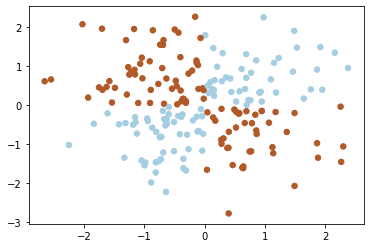

In [25]:
# порождаем данные
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired);

In [26]:
def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(Z, interpolation='nearest',
                           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                           aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                               linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$') 
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);

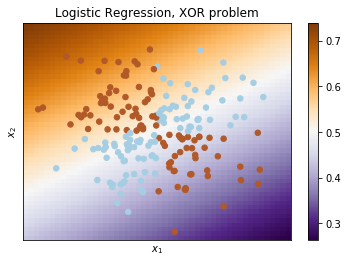

In [27]:
plot_boundary(LogisticRegression(), X, y,
              "Logistic Regression, XOR problem")

In [28]:
logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)), 
                       ('logit', LogisticRegression())])

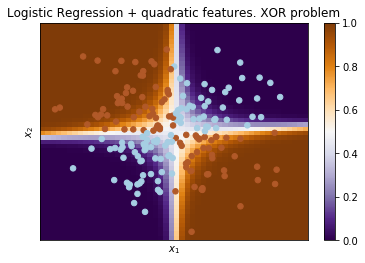

In [29]:
plot_boundary(logit_pipe, X, y,
              "Logistic Regression + quadratic features. XOR problem")